In [83]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from pylab import * 
import csv

In [84]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
# Read in the comment into a dataframe
df = pd.read_csv('wellsfargo_test_tweets.csv')
# Analyze the comment

sentiment_arr = []

In [85]:
for i in range(0,19444):
    sample = df.iloc[i,0]
    compound = analyzer.polarity_scores(sample)['compound']
    pos = analyzer.polarity_scores(sample)['pos']
    neu = analyzer.polarity_scores(sample)['neu']
    neg = analyzer.polarity_scores(sample)['neg']
    row = [compound,pos,neu,neg]
    if(i == 19443):
        print(sample)
        print(row)
    sentiment_arr.append(row)

I have nothing to wear tomorrow and I tried to go shopping but Wells Fargo screwed me out of all of my money 😭😭😭😭 nothing fits me!
[-0.967, 0.045, 0.575, 0.381]


In [86]:
import csv
f = open('wellsfargo_sentiment.csv', 'w')
with f:

    writer = csv.writer(f)
    
    for row in sentiment_arr:
        writer.writerow(row)

In [103]:
data = pd.read_csv("wellsfargo_refined_tweets.csv")
data.head()

,tweet,date,favorites,retweeted,retweets,screen_name,tweet.1,tweet_id,user_followers,user_verified,Compound,Pos,Neu,Neg
0,I just checked in at Wells Fargo with #mPLUSPl...,8/25/16 0:00,0,0,0,LeroysApps,I just checked in at Wells Fargo with #mPLUSPl...,7.690000e+17,0.0,0,0.3164,0.172,0.828,0.000
1,I just checked in at Wells Fargo with #mPLUSPl...,8/25/16 0:02,0,0,0,OriginalMeanOne,I just checked in at Wells Fargo with #mPLUSPl...,7.690000e+17,36.0,0,0.3164,0.172,0.828,0.000
2,@TheyCallMeCL We've addressed a similar concer...,8/25/16 0:06,0,0,0,Ask_WellsFargo,@TheyCallMeCL We've addressed a similar concer...,7.690000e+17,68510.0,0,0.8481,0.405,0.595,0.000
3,@Ask_WellsFargo it doesnt help that I now cant...,8/25/16 0:13,0,0,0,GZBgeorge,@Ask_WellsFargo it doesnt help that I now cant...,7.690000e+17,1622.0,0,0.6713,0.177,0.777,0.047
4,@Ask_WellsFargo I'll remind you of what's on t...,8/25/16 0:17,0,0,0,StrattonCoInc,@Ask_WellsFargo I'll remind you of what's on t...,7.690000e+17,8.0,0,0.6166,0.228,0.772,0.000


In [104]:
favorites = data.iloc[:,2]
favorites = favorites.dropna()

In [105]:
retweets = data.iloc[:,4]
retweets = retweets.dropna()

In [106]:
followers = data.iloc[:,8]
followers = followers.dropna()

In [119]:
followers

0            0.0
1           36.0
2        68510.0
3         1622.0
4            8.0
          ...   
19439      939.0
19440      428.0
19441     1425.0
19442       28.0
19443      263.0
Name: user_followers, Length: 19442, dtype: float64

In [107]:
compound = data.iloc[:,10]
pos = data.iloc[:,11]
neu = data.iloc[:,12]
neg = data.iloc[:,13]

compound = compound.dropna()
pos = pos.dropna()
neu = neu.dropna()
neg = neg.dropna()

In [108]:
metadata = [favorites, retweets, followers]
sentiment_scores = [compound, pos, neu, neg]

In [109]:
data = {'favorites': favorites,
        'retweets': retweets,
        'followers': followers,
        'compound': compound,
        'pos': pos,
        'neu': neu,
        'neg': neg
        }

In [110]:
df = pd.DataFrame(data, columns=['favorites', 'retweets','followers', 'compound', 'pos', 'neu', 'neg'])

In [111]:
corrMatrix = df.corr()
print (corrMatrix)

           favorites  retweets  followers  compound       pos       neu  \
favorites   1.000000  0.901489   0.223655 -0.010936 -0.004560 -0.005649   
retweets    0.901489  1.000000   0.294700 -0.012816 -0.007271 -0.003558   
followers   0.223655  0.294700   1.000000 -0.022278 -0.004345 -0.017237   
compound   -0.010936 -0.012816  -0.022278  1.000000  0.701773  0.157414   
pos        -0.004560 -0.007271  -0.004345  0.701773  1.000000 -0.529854   
neu        -0.005649 -0.003558  -0.017237  0.157414 -0.529854  1.000000   
neg         0.010399  0.010413   0.023334 -0.794985 -0.278792 -0.666741   

                neg  
favorites  0.010399  
retweets   0.010413  
followers  0.023334  
compound  -0.794985  
pos       -0.278792  
neu       -0.666741  
neg        1.000000  


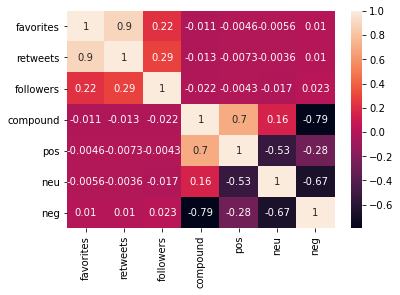

In [112]:
sn.heatmap(corrMatrix, annot=True)
plt.show()

indicates that the stronger the sentiment, not necessarily mean more people will like or retweet it

In [121]:
metadata_labels = ['favorites', 'retweets']
sentiment_scores_labels = ['compound', 'pos', 'neu', 'neg']

In [122]:
len(followers)

19442

In [123]:
len(compound)

19444

IndexError: list index out of range

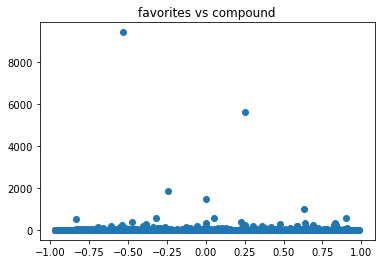

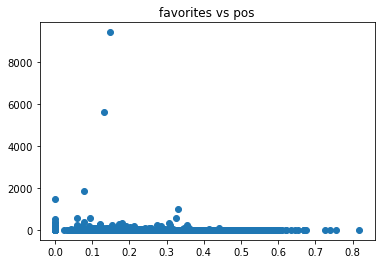

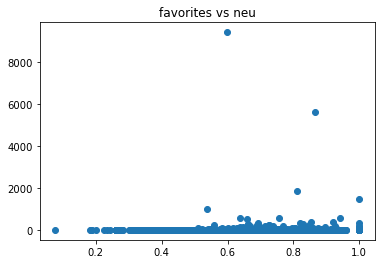

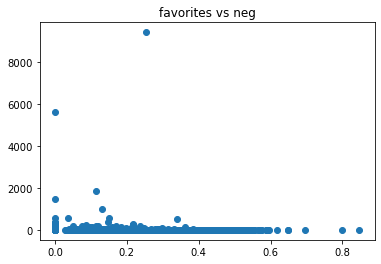

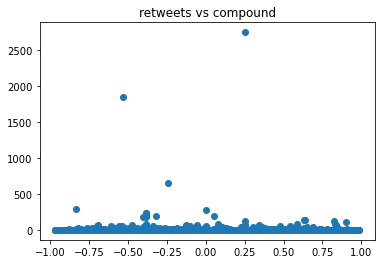

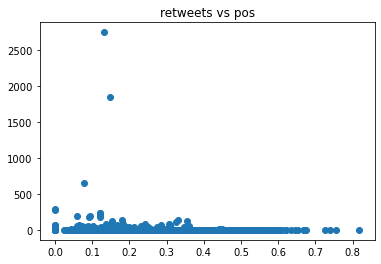

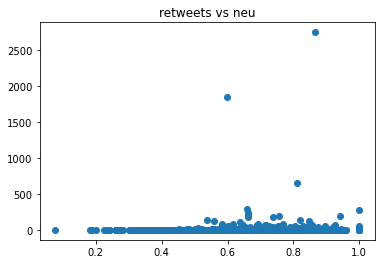

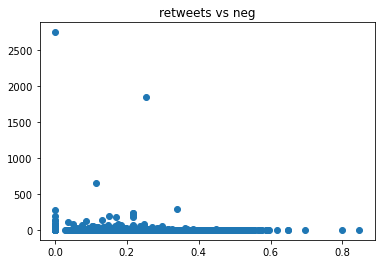

In [124]:
count1 = 0
count2 = 0
for i in metadata:
    count2 = 0
    for j in sentiment_scores:
        title = metadata_labels[count1] + " vs "+ sentiment_scores_labels[count2]
        plt.figure()
        plt.title(title)
        plt.scatter(j,i)
        count2 = count2 + 1
    count1 = count1 + 1
        

In [ ]:
plt.scatter(compound,favorites)
plt.ylim(0,750)

In [ ]:
count = 0
for j in sentiment_scores:
    plt.figure()
    title =  sentiment_scores_labels[count] + " Density"
    plt.title(title)
    plt.hist(j)
    count = count + 1
        

In [ ]:
m,b = polyfit(compound, favorites, 1) 
plot(compound, favorites, 'yo', compound, m*compound+b, '--k') 
show() 

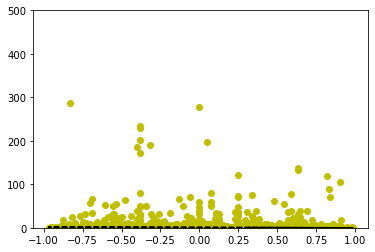

In [125]:
m,b = polyfit(compound, retweets, 1) 
plot(compound, retweets, 'yo', compound, m*compound+b, '--k') 
ylim(0,500)
show() 
